 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


Bad key savefig.frameon in file /Users/brando/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/brando/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/brando/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path('whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_csv,index_col='Date',parse_dates=True,
    infer_datetime_format=True).sort_index()


In [3]:
# Count nulls
whale_returns_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path('algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_csv,index_col='Date',parse_dates=True,
    infer_datetime_format=True).sort_index()

In [6]:
# Count nulls
algo_returns_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path('sp500_history.csv')
sp500_history_df = pd.read_csv(sp500_history_csv,index_col='Date',parse_dates=True,
    infer_datetime_format=True)
sp500_history_df = sp500_history_df.sort_index()

In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].replace('[\$\,\.]',"",regex=True).astype(float).dropna()
sp500_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
daily_returns = sp500_history_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
daily_returns.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={'Close': 'S&P500'}) 
daily_returns.head()

,S&P500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df,daily_returns], axis="columns", join="inner")

#combined_df.sort_index(inplace=True)


combined_df.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

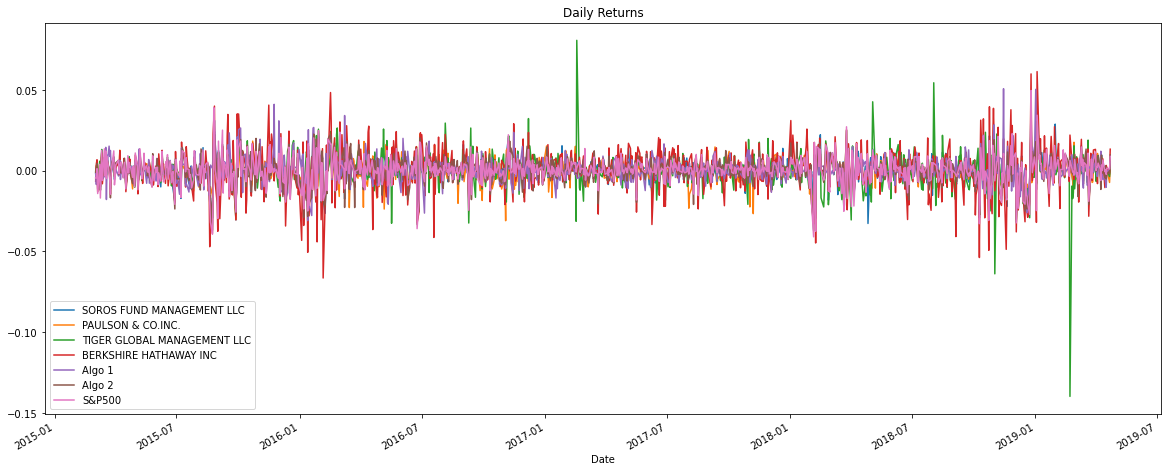

In [15]:
# Plot daily returns of all portfolios
daily_returns = combined_df.plot(figsize=(20,8),title='Daily Returns')
daily_returns

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

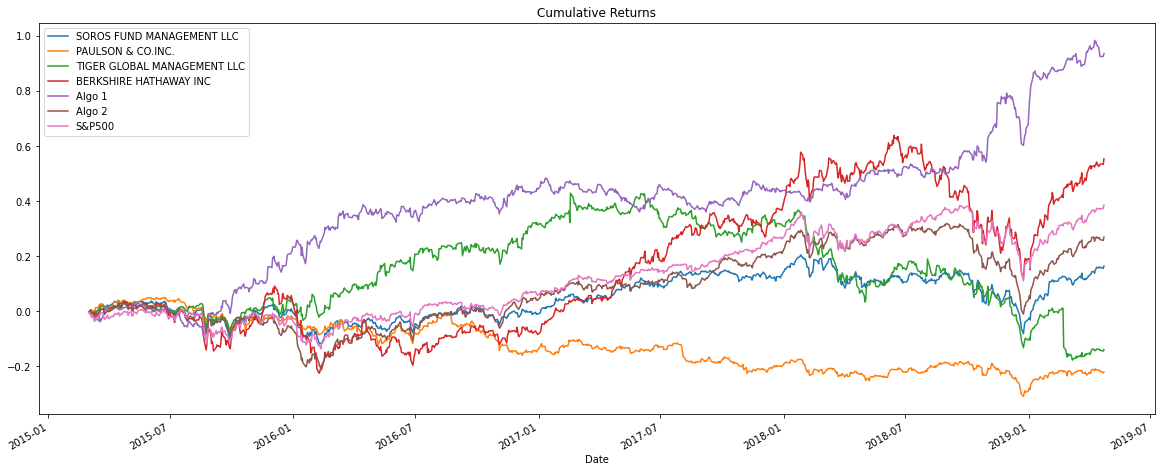

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,8),title='Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

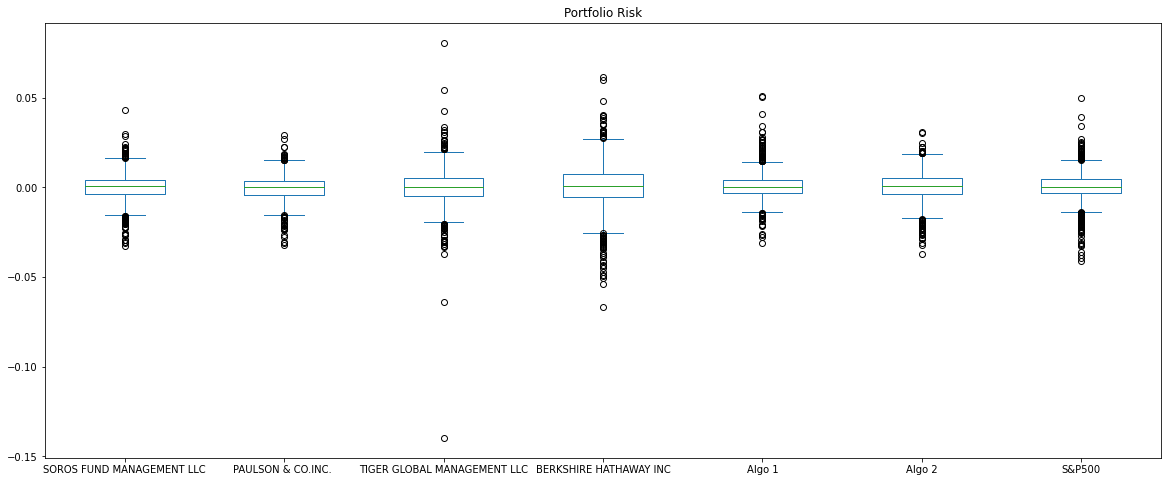

In [17]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,8), title='Portfolio Risk')

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()




SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
SandP_risk = combined_df['S&P500'].std()

# Determine which portfolios are riskier than the S&P 500
combined_df.std()>SandP_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviantion = combined_df.std()*np.sqrt(252)
annualized_standard_deviantion

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Standard Deviation'}, xlabel='Date'>

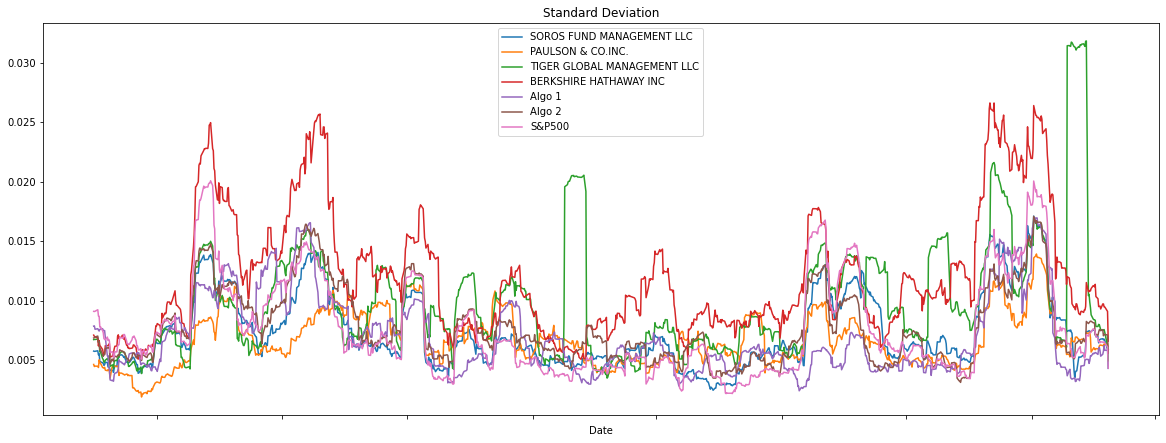

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot(figsize=(20,8), title='Standard Deviation')
# Plot the rolling standard deviation
annualized_standard_deviantion.rolling(window=21).std().plot(figsize=(20,8))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
price_correlation = combined_df.corr()
# Display de correlation matrix
corr = price_correlation.corr()

corr.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.636356,0.260375,0.763977,-0.681922,0.897783,0.902062
PAULSON & CO.INC.,0.636356,1.000000,0.053125,0.357812,-0.588468,0.632849,0.571768
TIGER GLOBAL MANAGEMENT LLC,0.260375,0.053125,1.000000,0.027548,-0.743623,0.209262,0.412049
BERKSHIRE HATHAWAY INC,0.763977,0.357812,0.027548,1.000000,-0.536068,0.681633,0.740324
Algo 1,-0.681922,-0.588468,-0.743623,-0.536068,1.000000,-0.654272,-0.767026
Algo 2,0.897783,0.632849,0.209262,0.681633,-0.654272,1.000000,0.919011
S&P500,0.902062,0.571768,0.412049,0.740324,-0.767026,0.919011,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [23]:
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


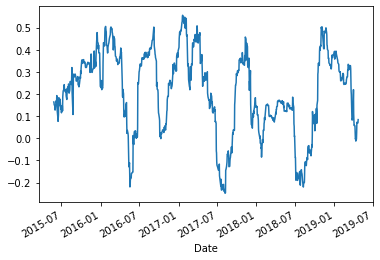

In [24]:
# Calculate covariance of a single portfolio   
combined_df = combined_df.dropna()

covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P500'])
                                                        
# Calculate variance of S&P 500
variance = combined_df['S&P500'].rolling(window=60).var()

# Computing beta
beta = covariance / variance
beta
# Plot beta trend
beta.plot();

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

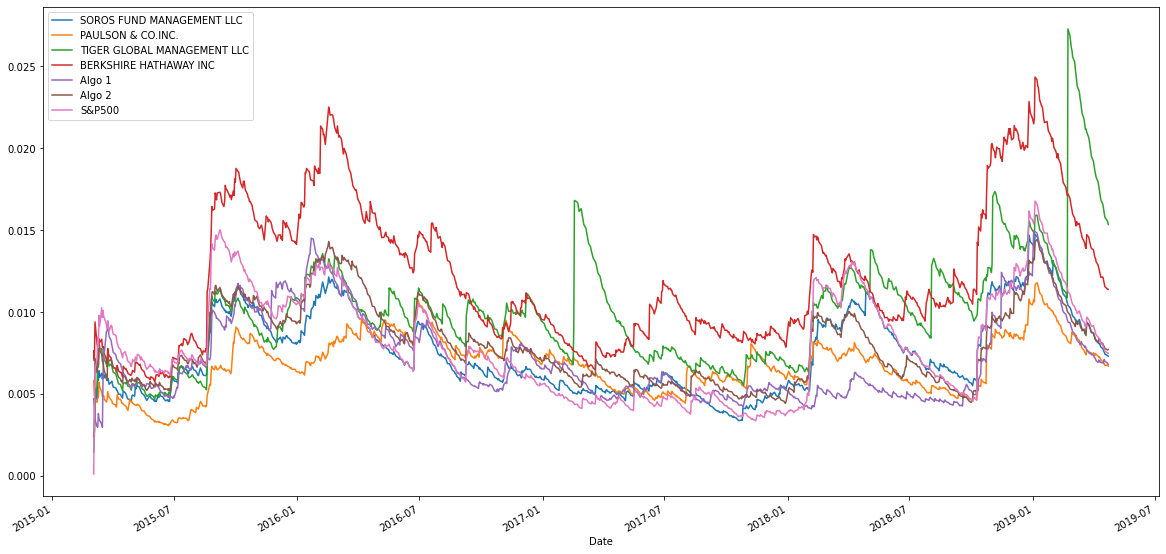

In [25]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10));


#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
rf_rate = 0.3
sharpe_ratios = ((combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

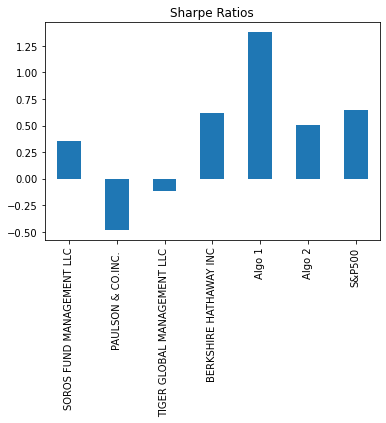

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios");

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperforms all portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [80]:
# Get stock data
google_csv = Path("goog_historical.csv")
google_historical = pd.read_csv(
    google_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_historical = google_historical.sort_index()
google_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [82]:
# Reading data from 1st stock
apple_csv = Path("aapl_historical.csv")
apple_historical = pd.read_csv(
    apple_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical = apple_historical.sort_index()
apple_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [83]:
# Reading data from 2nd stock
apple_csv = Path("aapl_historical.csv")
apple_historical = pd.read_csv(
    apple_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical = apple_historical.sort_index()
apple_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [84]:
# Reading data from 3rd stock
costco_csv = Path("cost_historical.csv")
costco_historical = pd.read_csv(
    costco_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_historical = costco_historical.sort_index()
costco_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [85]:
# Combine all stocks in a single DataFrame
stock_data_concatenated = pd.concat([google_historical, apple_historical, costco_historical], axis="rows", join="inner")
stock_data_concatenated.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [86]:
# Reset Date index
stock_data_concatenated = stock_data_concatenated.reset_index()
stock_data_concatenated.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [87]:
# Reorganize portfolio data by having a column per symbol
reorganized_portfolio = stock_data_concatenated.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
reorganized_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [93]:
# Calculate daily returns
daily_returns = reorganized_portfolio.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [96]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = daily_returns.dot(weights)

# Display sample data
weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [101]:
# Join your returns DataFrame to the original returns DataFrame
combined_df["Customized"] = weighted_returns
combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Customized
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [103]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df = combined_df.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [104]:
# Calculate the annualized `std`
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P500                         0.152054
Customized                     0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

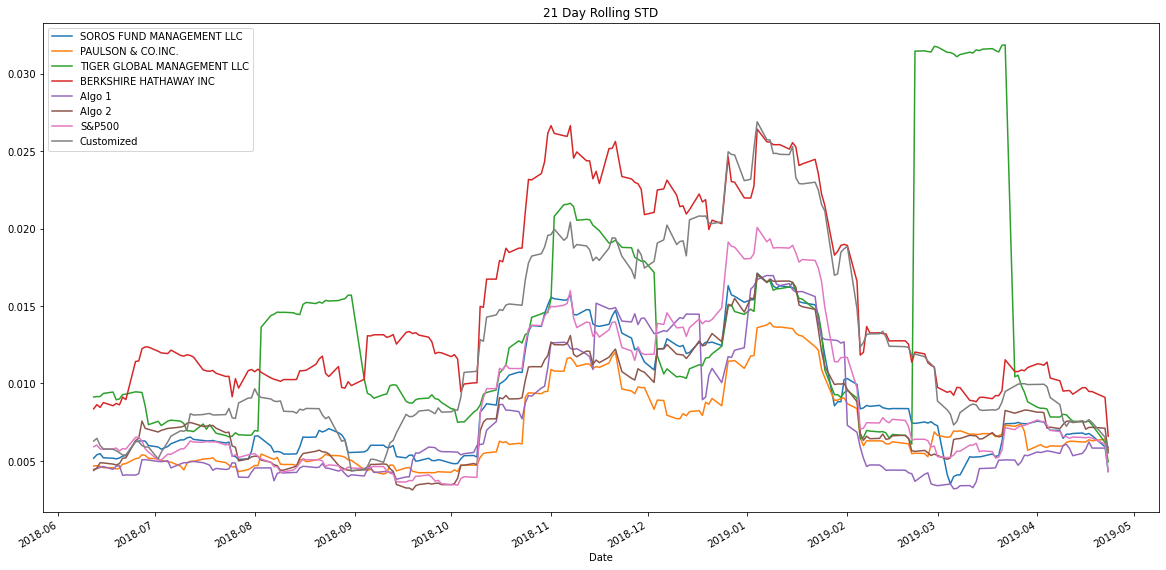

In [106]:
# Calculate rolling standard deviation
rolling_std = combined_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(20, 10), title="21 Day Rolling STD");

### Calculate and plot the correlation

In [108]:
# Calculate and plot the correlation
df = combined_df.corr()
df.style.background_gradient(cmap="PuBu")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Customized
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Customized,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

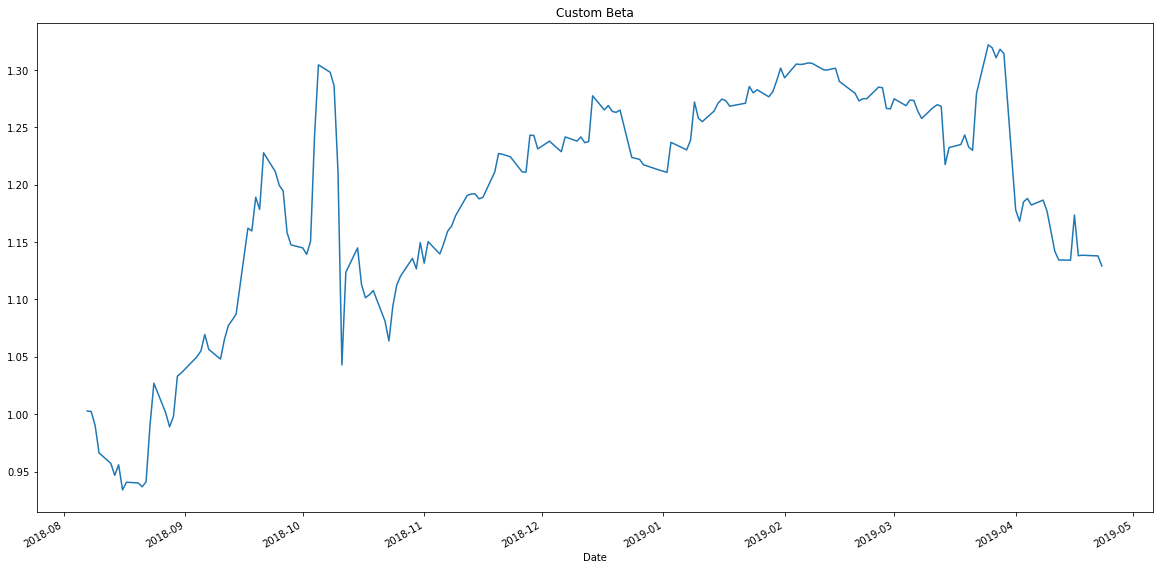

In [114]:
# Calculate and plot Beta
covariance = combined_df["Customized"].rolling(window=60).cov(combined_df["S&P500"])
variance = combined_df["S&P500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Beta");

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [115]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P500                         0.584820
Customized                     0.933123
dtype: float64

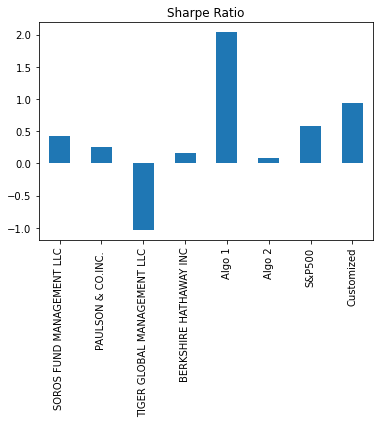

In [116]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratio");

### How does your portfolio do?

Write your answer here!

My portfolio is the second best!